
# Final Project: Car Classificaton

Author: George Cherukara Joggy

---

## Basic level

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### Read in 'cars-train.csv' and store it in a DataFrame named cars_training.

In [4]:
cars_training = pd.read_csv('./datasets/cars-train.csv')
cars_training.head(10)
#cars_training.shape

,car_id,buying,maint,doors,persons,lug_boot,safety,car_class
0,1,vhigh,vhigh,2,2,small,low,unacc
1,3,vhigh,vhigh,2,2,small,high,unacc
2,4,vhigh,vhigh,2,2,med,low,unacc
3,5,vhigh,vhigh,2,2,med,med,unacc
4,7,vhigh,vhigh,2,2,big,low,unacc
5,11,vhigh,vhigh,2,4,small,med,unacc
6,12,vhigh,vhigh,2,4,small,high,unacc
7,14,vhigh,vhigh,2,4,med,med,unacc
8,15,vhigh,vhigh,2,4,med,high,unacc
9,16,vhigh,vhigh,2,4,big,low,unacc


## 1. EDA

#### 1.1 use describe to understand the unique values, frequency mean (if applicable) etc

In [3]:
# Describe all columns, including non-numeric.
cars_training.describe(include='all')

,car_id,buying,maint,doors,persons,lug_boot,safety,car_class
count,970.000000,970,970,970,970,970,970,970
unique,NaN,4,4,4,3,3,3,4
top,NaN,med,low,4,2,med,low,unacc
freq,NaN,255,253,257,333,333,325,680
mean,868.518557,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,496.760359,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,436.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,873.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1288.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
#understand class variance of the target variable
cars_training.safety.value_counts()

low     325
high    323
med     322
Name: safety, dtype: int64

In [4]:
#understand class variance of the target variable
cars_training.car_class.value_counts()

unacc    680
acc      216
good      38
vgood     36
Name: car_class, dtype: int64

#### 1.2 create dummy features for category features

In [6]:
# convert buying column to dummy numerics column using getdummies
buying_dumm = pd.get_dummies(cars_training.buying, prefix='buy',drop_first=True)
buying_dumm.head()

,buy_low,buy_med,buy_vhigh
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1


In [7]:
# convert maint column to dummy numerics column using getdummies
maint_dumm = pd.get_dummies(cars_training.maint, prefix='maint',drop_first=True)
maint_dumm.head()

,maint_low,maint_med,maint_vhigh
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1


In [8]:
# convert doors column to dummy numerics column using getdummies
doors_dumm = pd.get_dummies(cars_training.doors, prefix='doors',drop_first=True)
doors_dumm.head()

,doors_3,doors_4,doors_5more
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [9]:
# convert persons column to dummy numerics column using getdummies
pers_dumm = pd.get_dummies(cars_training.persons, prefix='pers',drop_first=True)
pers_dumm.head()

,pers_4,pers_more
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [10]:
# convert lug_boot column to dummy numerics column using getdummies
lug_dumm = pd.get_dummies(cars_training.lug_boot, prefix='lug',drop_first=True)
lug_dumm.head()

,lug_med,lug_small
0,0,1
1,0,1
2,1,0
3,1,0
4,0,0


In [11]:
# convert safety column to dummy numerics column using getdummies
safety_dumm = pd.get_dummies(cars_training.safety, prefix='safety',drop_first=True)
safety_dumm.head()

,safety_low,safety_med
0,1,0
1,0,0
2,1,0
3,0,1
4,1,0


#### 1.3 create ordinal values for target class

In [12]:
cars_training['car_class_num'] = cars_training.car_class.map({'unacc':0, 'acc':1, 'good':2,'vgood':3 })


In [13]:
cars_training.head()

,car_id,buying,maint,doors,persons,lug_boot,safety,car_class,car_class_num
0,1,vhigh,vhigh,2,2,small,low,unacc,0
1,3,vhigh,vhigh,2,2,small,high,unacc,0
2,4,vhigh,vhigh,2,2,med,low,unacc,0
3,5,vhigh,vhigh,2,2,med,med,unacc,0
4,7,vhigh,vhigh,2,2,big,low,unacc,0


#### 1.4 create raw training data using all numberical/boolean values

In [18]:
cars_train_nw = pd.concat([cars_training['car_id'],buying_dumm,maint_dumm,doors_dumm,pers_dumm,lug_dumm,safety_dumm,cars_training['car_class_num']], axis=1)
cars_train_nw.head()
predictors = ['buy_low', 'buy_med', 'buy_vhigh', 'maint_low', 'maint_med','maint_vhigh', 'doors_3', 'doors_4', 'doors_5more', 'pers_4','pers_more', 'lug_med', 'lug_small', 'safety_low', 'safety_med']

#### 1.5 use SMOTE-Tomek to oversamble minority classes for car_class_num

In [28]:
from imblearn.combine import SMOTETomek
X = pd.DataFrame(cars_train_nw, columns=predictors)
y = pd.DataFrame(cars_train_nw, columns=['car_class_num'])
sm = SMOTETomek()
X_resampled, y_resampled = sm.fit_sample(X, y)
from collections import Counter
print(sorted(Counter(y_resampled).items()))

X_nw = pd.DataFrame(X_resampled, columns=predictors)
y_nw = pd.DataFrame(y_resampled, columns=['car_class_num'])


[(0, 675), (1, 583), (2, 526), (3, 556)]


/Users/admin/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#### 1.6 draw a correlation plot to visualise relationship between the features

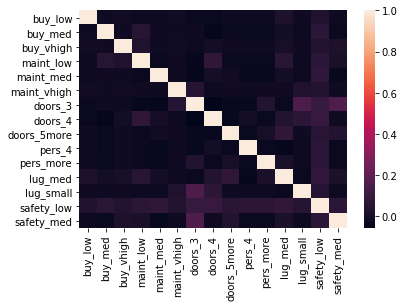

In [32]:
import seaborn as sns
sns.heatmap(X_nw.corr())

In [31]:
X_nw.shape

(2340, 15)